# Question Answer Retrieval

- You can input a query or a question. The script then uses semantic search to find relevant passages in Simple English Wikipedia (as it is smaller and fits better in RAM)
- https://huggingface.co/models?library=sentence-transformers&sort=downloads
- we use: `nq-distilbert-base-v1`

- It was trained on the Natural Questions dataset, a dataset with real questions from Google Search together with annotated data from Wikipedia providing the answer. For the passages, we encode the Wikipedia article tile together with the individual text passages.

- Train Dataset: https://ai.google.com/research/NaturalQuestions/dataset
- Test Dataset: http://sbert.net/datasets/

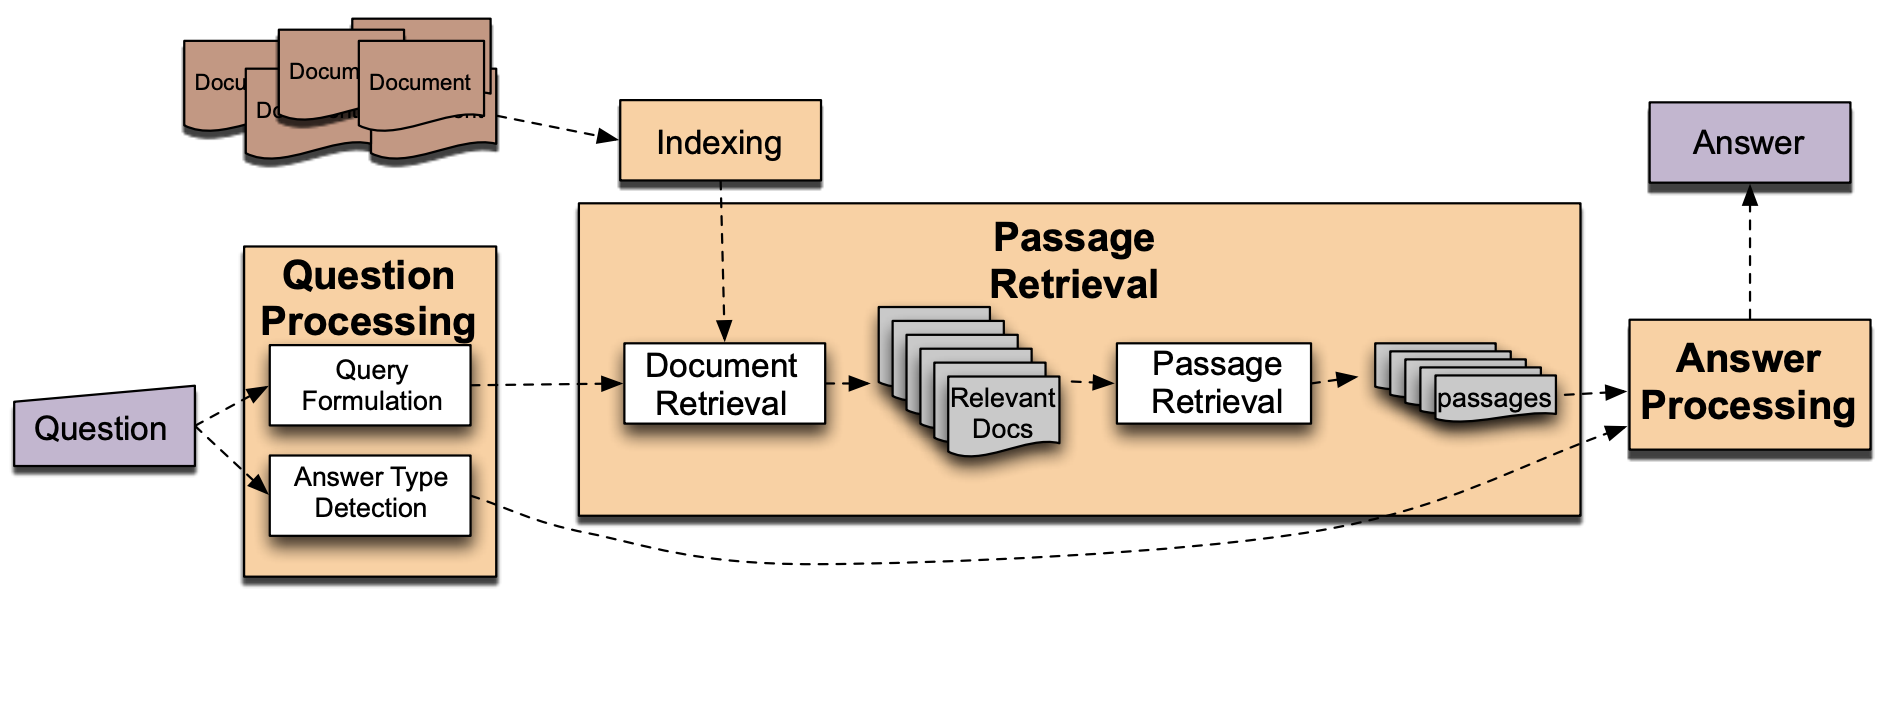

In [ ]:
# https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/simplewiki-2020-11-01.jsonl.gz

In [1]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.3 MB/s 
     |████████████████████████████████| 5.8 MB 44.2 MB/s 
     |████████████████████████████████| 1.3 MB 58.9 MB/s 
     |████████████████████████████████| 182 kB 77.2 MB/s 
     |████████████████████████████████| 7.6 MB 52.7 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=2c61be3096f4809e04082bd9f0f6f6ccd24b7faa8daf5c9e88e291a08fe4b5c1
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [2]:
from sentence_transformers import SentenceTransformer, util
import os
import json
import gzip

In [3]:
util.http_get('https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/simplewiki-2020-11-01.jsonl.gz', 'simplewiki-2020-11-01.jsonl.gz')

  0%|          | 0.00/50.2M [00:00<?, ?B/s]

In [4]:
model = SentenceTransformer('nq-distilbert-base-v1')

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/540 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/554 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [7]:
passages = []
with gzip.open('simplewiki-2020-11-01.jsonl.gz', 'rt', encoding='utf8') as file:
  for line in file:
    data = json.loads(line.strip())
    #print(data)
    for paragraph in data['paragraphs']:
      passages.append([data['title'], paragraph])
    #break

In [8]:
len(passages)

509663

In [10]:
from random import shuffle
shuffle(passages)

In [13]:
passages = passages[0:100_000]

In [15]:
len(passages)

100000

In [16]:
corpus_embeddings = model.encode(passages, convert_to_tensor=True, show_progress_bar=True)

Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

In [17]:
def get_answer(query):

  question_embedding = model.encode(query, convert_to_tensor=True)
  hits = util.semantic_search(question_embedding, corpus_embeddings, top_k=3)[0]

  print("Results:")
  for hit in hits:
    print(passages[hit['corpus_id']])

In [18]:
get_answer("what is capital of India")

Results:
['Bangalore', 'Former Bangalore (English pronunciation: ˈbæŋɡəlɔər, bæŋɡəˈlɔər), today again and officially known as Bengaluru () is the capital city of the Indian state of Karnataka. It is famous for its Information technology industry and so it is called the Silicon Valley of India. Today as a large and growing city, Bangalore has many of the most well-recognized colleges and research institutions in India.']
['Capital city', "A capital city (or capital town or just capital) is a city or town, specified by law or constitution, by the government of a country, or part of a country, such as a state, province or county. It usually serves as the location of the government's central meeting place and offices. Most of the country's leaders and officials work in the capital city."]
['Bhubaneshwar', 'Bhubaneshwar is the capital city of the Indian state of Odisha. It is the largest city in Odisha. Bhubaneswar means "lord of the world". Many temples are present in this city. So, it is 

In [19]:
get_answer("when did the cold war end?")

Results:
['Cold War', 'Not all historians agree on when the Cold War ended. Some think it ended when the Berlin Wall fell. Others think it ended when the Soviet Union collapsed in 1991.']
['Cold War', 'After the fall of the Berlin Wall in 1989 and without Communist rule holding together the countries that comprised the Soviet Union, the USSR broke into smaller countries, like Russia, Ukraine, Lithuania and Georgia. The nations of Eastern Europe returned to capitalism, and the period of the Cold War was over. The Soviet Union ended in December 1991.']
['Mikhail Gorbachev', 'His attempts at reform and partnership with Ronald Reagan led to the end of the Cold War. His main intent was to improve the economy of the USSR. To do this, he set in motion two major reforms:']


In [20]:
get_answer("when did the world war end?")

Results:
['Interwar period', 'The interwar period was a time in history between the two world wars, World War I and World War II, which was between 1918–1939.']
['Surrender of Japan', 'The surrender of Imperial Japan was announced by Japanese Emperor Hirohito on August 15 and formally signed on September 2, 1945. This ended World War II.']
['History of the world', 'On November 11, 1918, Germany signed the armistice, meaning "the laying down of arms", to end the war. After the war ended, the Treaty of Versailles was written and Germany was made to sign it. They had to pay $33 million in reparations (payment for damage). The influenza pandemic of 1918 spread around the world, killing millions.']
